# This file is meant to showcase visualizations based on the SQL files that belong to this portfolio.
# You can run this file with the 3 CSV files on Github. While it is meant to compliment the SQL file, you can see most of the same data in this file alone.

In [79]:
#importing all the libraries we may need
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as pplot
import matplotlib.ticker as mticker

In [80]:
#Let's put each data frame into a variable
CStats = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
CCodes = pd.read_csv("Crime_Codes.csv")
MOCodes = pd.read_csv("MO_Codes.csv")

In [81]:
#A quick cleaning tool
CStats.columns = CStats.columns.str.strip().str.replace(' ', '_')
CCodes.columns = CCodes.columns.str.strip().str.replace(' ', '_')
MOCodes.columns = MOCodes.columns.str.strip().str.replace(' ', '_')

### The first thing we need to do is replicate the SQL file where we cleaned up the names of the columns.

In [82]:
CStats.rename(columns={'Rpt_Dist_No': 'District_No'}, inplace=True)

CStats.rename(columns={'Crm_Cd': 'Crime_Code'}, inplace=True)

CStats.rename(columns={'Crm_Cd_Desc': 'Crime_Code_Desc'}, inplace=True)

CStats.rename(columns={'Mocodes': 'MO_Codes'}, inplace=True)

CStats.rename(columns={'Premis_Cd': 'Premisis_Code'}, inplace=True)

CStats.rename(columns={'Premis_Desc': 'Premisis_Desc'}, inplace=True)

CStats.rename(columns={'Weapon_Used_Cd': 'Weapon_Code'}, inplace=True)

### Let's verify the new names

In [83]:
CStats.columns.tolist()

['DR_NO',
 'Date_Rptd',
 'DATE_OCC',
 'TIME_OCC',
 'AREA',
 'AREA_NAME',
 'District_No',
 'Part_1-2',
 'Crime_Code',
 'Crime_Code_Desc',
 'MO_Codes',
 'Vict_Age',
 'Vict_Sex',
 'Vict_Descent',
 'Premisis_Code',
 'Premisis_Desc',
 'Weapon_Code',
 'Weapon_Desc',
 'Status',
 'Status_Desc',
 'Crm_Cd_1',
 'Crm_Cd_2',
 'Crm_Cd_3',
 'Crm_Cd_4',
 'LOCATION',
 'Cross_Street',
 'LAT',
 'LON']

### Now we can take a look at the DFs

In [84]:
CStats

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,District_No,Part_1-2,Crime_Code,Crime_Code_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,02/02/2025 12:00:00 AM,02/02/2025 12:00:00 AM,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


In [85]:
MOCodes

,MO_Code,MO_Description
0,100,Suspect Impersonate
1,101,Aid victim
2,102,Blind
3,103,Physically disabled
4,104,Customer
...,...,...
819,4021,Traffic Collision - Topanga
820,4024,Traffic Collision - Central Traffic (CTD)
821,4025,Traffic Collision - South Traffic (STD)
822,4026,Traffic Collision - Valley Traffic (VTD)


In [86]:
CCodes

,Code,Description,Category,Subcategory
0,110,Homicide,Violent Crimes,Homicide
1,113,Manslaughter,Violent Crimes,Homicide
2,121,Rape,Violent Crimes,Rape
3,122,Attempted Rape,Violent Crimes,Rape
4,815,Sexual Penetration w/ Foreign Object,Violent Crimes,Rape
...,...,...,...,...
62,475,Theft from coin m/c - attempted,Property Crimes,Other Theft
63,480,Bicycle - stolen,Property Crimes,Other Theft
64,485,Bicycle - attempted stolen,Property Crimes,Other Theft
65,487,Boat - stolen,Property Crimes,Other Theft


### Everything looks good, but we need to verify that the column types are correct.

In [87]:
CStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   DR_NO            1004991 non-null  int64  
 1   Date_Rptd        1004991 non-null  object 
 2   DATE_OCC         1004991 non-null  object 
 3   TIME_OCC         1004991 non-null  int64  
 4   AREA             1004991 non-null  int64  
 5   AREA_NAME        1004991 non-null  object 
 6   District_No      1004991 non-null  int64  
 7   Part_1-2         1004991 non-null  int64  
 8   Crime_Code       1004991 non-null  int64  
 9   Crime_Code_Desc  1004991 non-null  object 
 10  MO_Codes         853372 non-null   object 
 11  Vict_Age         1004991 non-null  int64  
 12  Vict_Sex         860347 non-null   object 
 13  Vict_Descent     860335 non-null   object 
 14  Premisis_Code    1004975 non-null  float64
 15  Premisis_Desc    1004403 non-null  object 
 16  Weapon_Code      3

### We now see that the dates were not recognized so we need to fix this manually.

In [88]:
CStats['Date_Rptd'] = pd.to_datetime(CStats['Date_Rptd'])
CStats['DATE_OCC'] = pd.to_datetime(CStats['DATE_OCC'])
CStats['TIME_OCC'] = pd.to_datetime(
    CStats['TIME_OCC'].astype(str).str.zfill(4),
    format='%H%M').dt.time
CStats.info()

C:\Users\adkwe\AppData\Local\Temp\ipykernel_28488\625379872.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CStats['Date_Rptd'] = pd.to_datetime(CStats['Date_Rptd'])
C:\Users\adkwe\AppData\Local\Temp\ipykernel_28488\625379872.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CStats['DATE_OCC'] = pd.to_datetime(CStats['DATE_OCC'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   DR_NO            1004991 non-null  int64         
 1   Date_Rptd        1004991 non-null  datetime64[ns]
 2   DATE_OCC         1004991 non-null  datetime64[ns]
 3   TIME_OCC         1004991 non-null  object        
 4   AREA             1004991 non-null  int64         
 5   AREA_NAME        1004991 non-null  object        
 6   District_No      1004991 non-null  int64         
 7   Part_1-2         1004991 non-null  int64         
 8   Crime_Code       1004991 non-null  int64         
 9   Crime_Code_Desc  1004991 non-null  object        
 10  MO_Codes         853372 non-null   object        
 11  Vict_Age         1004991 non-null  int64         
 12  Vict_Sex         860347 non-null   object        
 13  Vict_Descent     860335 non-null   object        
 14  Pr

In [89]:
CStats

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,District_No,Part_1-2,Crime_Code,Crime_Code_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
0,211507896,2021-04-11,2020-11-07,08:45:00,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,2020-10-21,2020-10-18,18:45:00,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,2024-12-10,2020-10-30,12:40:00,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,2020-12-24,2020-12-24,13:10:00,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,2020-10-03,2020-09-29,18:30:00,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2025-02-02,2025-02-02,01:30:00,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,2025-02-18,2025-02-18,10:00:00,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,2025-01-31,2025-01-30,15:54:00,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,2025-01-17,2025-01-17,16:00:00,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


### Perfect! Now we can create some visualizations based on the SQL data we created.
### First thing is Crimes by Year

In [90]:
#First we can add a year column
CStats['OCC_Year'] = CStats['DATE_OCC'].dt.year

#Now we count the occurences and store them in a DF for the chart
crimes_per_year = CStats['OCC_Year'].value_counts().sort_index()

crimes_per_year = crimes_per_year.iloc[:-1]  # drops 2025, the data is incomplete

C:\Users\adkwe\AppData\Local\Temp\ipykernel_28488\2489379453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=crimes_per_year.index, y=crimes_per_year.values, palette = colors)


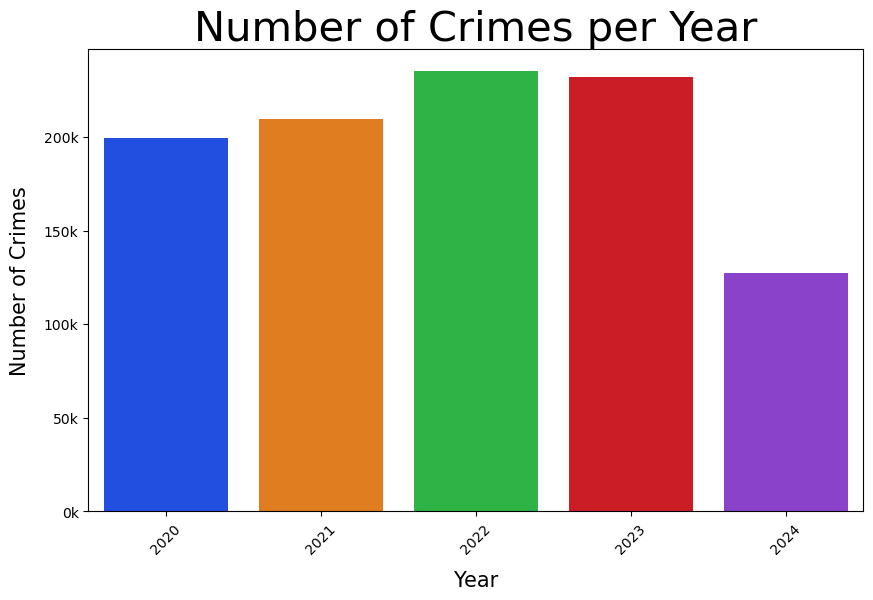

In [91]:
#In this cell we will plot our chart
#I ran the chart a few times and each time added a new parameter to make it look nicer
pplot.figure(figsize=(10,6))
colors = sb.color_palette("bright", len(crimes_per_year)) #The first time it was all the same color, and I wanted each year to be different
sb.barplot(x=crimes_per_year.index, y=crimes_per_year.values, palette = colors)

pplot.xlabel('Year', labelpad=10, fontsize=15) #The labels were small and didn't look good, so I added size and padding
pplot.ylabel('Number of Crimes', labelpad=10, fontsize=15)
pplot.title('Number of Crimes per Year', fontsize=30)
pplot.xticks(rotation=45)
pplot.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k')) #the raw numbers are hard to read at a glance
#so I truncated them
pplot.show()

### The crime data here is easy to see now. Crimes in California increased from 2020 to 2022. There was a small dropoff in 2023 and then a severe drop in 2024.

### Now let's take a look at the types of crimes committed

In [92]:
#The first thing we need to do is a merge (Python's version of a Join)
Merged_Codes = CStats.merge(CCodes, left_on = 'Crime_Code', right_on = 'Code', how = 'left')
Merged_Codes
#If you scroll to the end you can see the added info

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,District_No,Part_1-2,Crime_Code,Crime_Code_Desc,...,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON,OCC_Year,Code,Description,Category,Subcategory
0,211507896,2021-04-11,2020-11-07,08:45:00,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,2020,NaN,NaN,NaN,NaN
1,201516622,2020-10-21,2020-10-18,18:45:00,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,2020,230.0,Assault With Deadly Weapon (ADW),Violent Crimes,Agg. Assaults
2,240913563,2024-12-10,2020-10-30,12:40:00,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,2020,NaN,NaN,NaN,NaN
3,210704711,2020-12-24,2020-12-24,13:10:00,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,2020,331.0,Theft from vehicle - $950.01 & over,Property Crimes,Burglary/Theft From Vehicle
4,201418201,2020-10-03,2020-09-29,18:30:00,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,2020,420.0,Theft from vehicle - $950 & under,Property Crimes,Burglary/Theft From Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2025-02-02,2025-02-02,01:30:00,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126,2025,NaN,NaN,NaN,NaN
1004987,250404100,2025-02-18,2025-02-18,10:00:00,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,NaN,3500 PERCY ST,NaN,34.0277,-118.1979,2025,NaN,NaN,NaN,NaN
1004988,251304095,2025-01-31,2025-01-30,15:54:00,13,Newton,1372,2,850,INDECENT EXPOSURE,...,NaN,300 E 53RD ST,NaN,33.9942,-118.2701,2025,NaN,NaN,NaN,NaN
1004989,251704066,2025-01-17,2025-01-17,16:00:00,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,2025,624.0,Battery - misdemeanor,Violent Crimes,Simple Assault


In [93]:
#Now we need to count the crime codes - the list provided for us seems to be incomplete so we will only look at named codes
Code_Count = Merged_Codes['Code'].value_counts().head(10).reset_index()
Code_Count.columns = ['Crime_Code','Instances']
Code_Count = Code_Count.merge(CCodes[['Code', 'Description', 'Category']], left_on = 'Crime_Code', right_on = 'Code', how = 'left')


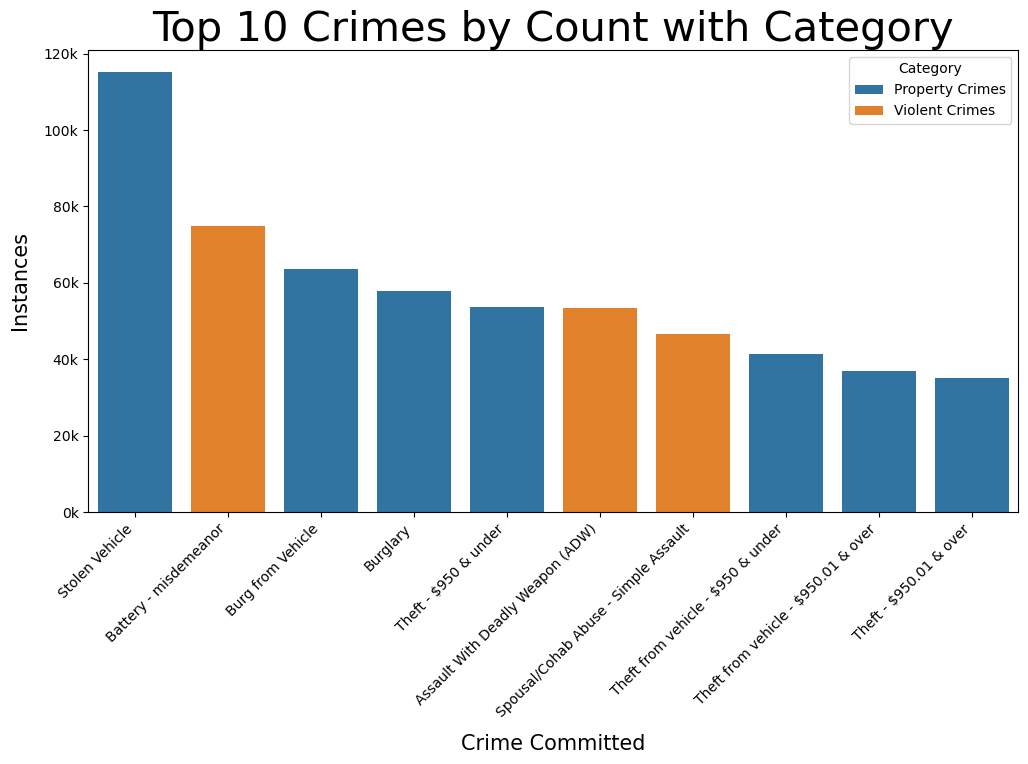

In [94]:
#Here we chart
pplot.figure(figsize=(12,6))
sb.barplot(
    data=Code_Count,
    x='Description',
    y='Instances',
    hue='Category',   # assigns colors by Category
    dodge=False        # so bars are stacked by category color (not side by side)
)
pplot.xlabel('Crime Committed',labelpad=10, fontsize=15)
pplot.ylabel('Instances',labelpad=10, fontsize=15)
pplot.title('Top 10 Crimes by Count with Category', fontsize=30)
pplot.xticks(rotation=45, ha='right')
pplot.legend(title='Category')
pplot.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
pplot.show()

### What can we learn from this chart?
### Most of the crime is theft, with Auto thefts being the most by a longshot.
### However, there are a few violent crimes here as well.

### The next section takes a deeper look into demographics.


In [96]:
#First we recreate the buckets like we had in SQL
age_bins = [1, 18, 22, 60, np.inf]
age_labels = ['Adolescent', 'Young Adult', 'Adult', 'Senior']

#Now we can create a column for them in our DF
CStats['age_group'] = pd.cut(CStats['Vict_Age'], bins = age_bins, labels = age_labels, right = False)

#We are also only interested in Male and Female data, to keep things simple
BGender = CStats[CStats['Vict_Sex'].isin(['M','F'])]
BGender = BGender[BGender['age_group'].notna()]

#Now we can create a DF that groups everything for us
demog_crime = (BGender.groupby(['AREA_NAME', 'Vict_Sex', 'age_group']).size().reset_index(name='Incidents'))
#And let's take a look
demog_crime

C:\Users\adkwe\AppData\Local\Temp\ipykernel_28488\2340005221.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demog_crime = (BGender.groupby(['AREA_NAME', 'Vict_Sex', 'age_group']).size().reset_index(name='Incidents'))


,AREA_NAME,Vict_Sex,age_group,Incidents
0,77th Street,F,Adolescent,1650
1,77th Street,F,Young Adult,1874
2,77th Street,F,Adult,20462
3,77th Street,F,Senior,2567
4,77th Street,M,Adolescent,951
...,...,...,...,...
163,Wilshire,F,Senior,2087
164,Wilshire,M,Adolescent,302
165,Wilshire,M,Young Adult,1010
166,Wilshire,M,Adult,14194


In [98]:
#This chart can tell us a lot but it's a little messy
#Let's try a pivot table and make it a little easier to read
demog_pivot = demog_crime.pivot_table(
    index = ['AREA_NAME','age_group'],
    columns = ['Vict_Sex'],
    values = ['Incidents'],
    fill_value = 'N/A'
)
demog_pivot

C:\Users\adkwe\AppData\Local\Temp\ipykernel_28488\2506508410.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  demog_pivot = demog_crime.pivot_table(


Incidents         
Vict_Sex                        F        M
AREA_NAME   age_group                     
77th Street Adolescent     1650.0    951.0
            Young Adult    1874.0   1069.0
            Adult         20462.0  14657.0
            Senior         2567.0   2623.0
Central     Adolescent      311.0    248.0
...                           ...      ...
West Valley Senior         2512.0   2873.0
Wilshire    Adolescent      373.0    302.0
            Young Adult     690.0   1010.0
            Adult         13105.0  14194.0
            Senior         2087.0   2486.0

[84 rows x 2 columns]

In [103]:
#Ok, so the data is nice to read but not visually appealing.
#Let's make a chart

#For the chart to be readable we need to cut down the num of locations - how about a top 5?
top5_locations = BGender['AREA_NAME'].value_counts().nlargest(5).index
top5_locations

Index(['Central', '77th Street', 'Pacific', 'Southwest', 'Hollywood'], dtype='object', name='AREA_NAME')

In [105]:
#Now that we have our locations let's store all the data for those places in a new DF for our chart
top5_stats = BGender[BGender['AREA_NAME'].isin(top5_locations)]

#Now we can run the group by and then the pivot
top5_demog = (
    top5_stats.groupby(['AREA_NAME', 'Vict_Sex', 'age_group']).size().reset_index(name='Incidents') )

#now we add a column with percentages of crime in that area per age group
top5_demog['percent'] = (
    top5_demog.groupby(['AREA_NAME', 'Vict_Sex'])['Incidents'].transform(lambda x: x / x.sum() * 100) )

#Now we pivot the data and then generate the chart
top5_pivot = top5_demog.pivot_table(
    index=['AREA_NAME', 'Vict_Sex'],
    columns='age_group',
    values='percent',
    fill_value=0
)

C:\Users\adkwe\AppData\Local\Temp\ipykernel_28488\4232139675.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top5_stats.groupby(['AREA_NAME', 'Vict_Sex', 'age_group']).size().reset_index(name='Incidents') )
C:\Users\adkwe\AppData\Local\Temp\ipykernel_28488\4232139675.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  top5_pivot = top5_demog.pivot_table(


<Figure size 2000x800 with 0 Axes>

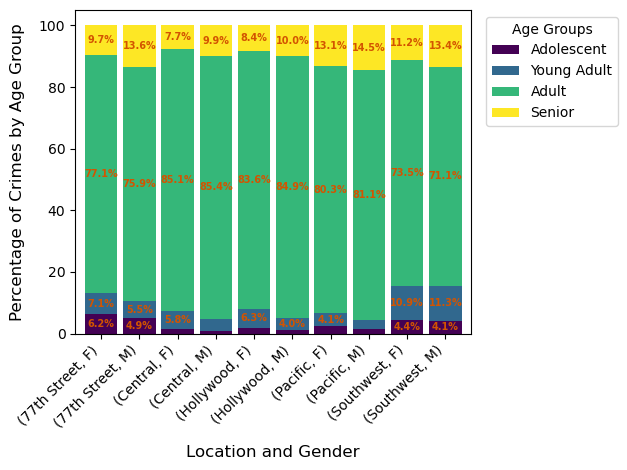

In [142]:
#Now we need to make the chart
pplot.figure(figsize=(20, 8))

top5_pivot.plot(kind='bar', stacked=True, colormap='viridis', width=0.85)
pplot.legend(
    title='Age Groups',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
pplot.xlabel('Location and Gender', fontsize=12, labelpad=10)
pplot.ylabel('Percentage of Crimes by Age Group', fontsize=12, labelpad=10)

pplot.xticks(rotation=45, ha='right', fontsize=10)
pplot.tight_layout()

text_color = '#D35400'

ax = pplot.gca()
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        if height > 4:
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                rect.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=7,
                color=text_color,
                fontweight='bold'
            )

### The overwhelming majority of crime is committed against adults (which makes sense as the age range is the greatest for adults)
### There is also a relatively even distribution across the different locations.